In [1]:
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
yf.download(tickers='OIL.NS', 
                       period='3y', 
                       interval='1d').head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-06,182.750000,182.949997,178.800003,179.750000,150.842667,1004429
2019-06-07,179.699997,181.449997,179.649994,180.000000,151.052475,765186
2019-06-10,179.600006,182.449997,179.000000,180.350006,151.346161,1339945
2019-06-11,179.500000,183.399994,179.500000,182.699997,153.318253,829420
2019-06-12,183.399994,183.800003,180.000000,181.300003,152.143387,637901


## Daily Returns

In [14]:
def plot_returns(ind_c, us_c ,p ,i):
    names={"ONGC.NS":"Oil and Natural Gas Corporation","XOM":"Exxon Oil",
       "RALLIS.NS":"Rallis","BAYERCROP.NS":"Bayer's Crop",
       "TECHM.NS":"Tech Mahindra","IBM":"IBM",
       "^NSEBANK":"Bank Nifty","^BKX":"US Bank Index"
          ,"OIL.NS":"Oil Nifty","CL=F":"US oil Index"}
    name_ind=[]
    name_us=[]
    if ind_c in [i for i in names.keys()]:
        name_ind.append(names[ind_c])
    if us_c in [i for i in names.keys()]:
        name_us.append(names[us_c])
    data_ind = yf.download(tickers=ind_c, 
                       period=p, 
                       interval=i)
    
    data_us = yf.download(tickers=us_c, 
                       period=p, 
                       interval=i)
    
    plt.figure(figsize = (16, 4))

    data_ind['Day_Perc_Change'] = data_ind['Close'].pct_change()*100
    data_ind.dropna(axis = 0, inplace = True)
    

    plt.subplot(1, 2, 1)
    plt.title(name_ind[0])
    plt.plot(data_ind['Day_Perc_Change'])
    plt.xticks(rotation=45)
    plt.ylabel("Returns")
    plt.xlabel("Date")
    
    data_us['Day_Perc_Change'] = data_us['Close'].pct_change()*100
    data_us.dropna(axis = 0, inplace = True)
    
    plt.subplot(1, 2, 2)
    plt.title(name_us[0])
    plt.plot(data_us['Day_Perc_Change'])
    plt.xticks(rotation=45)
    plt.ylabel("Returns")
    plt.xlabel("Date")
    
    
    plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


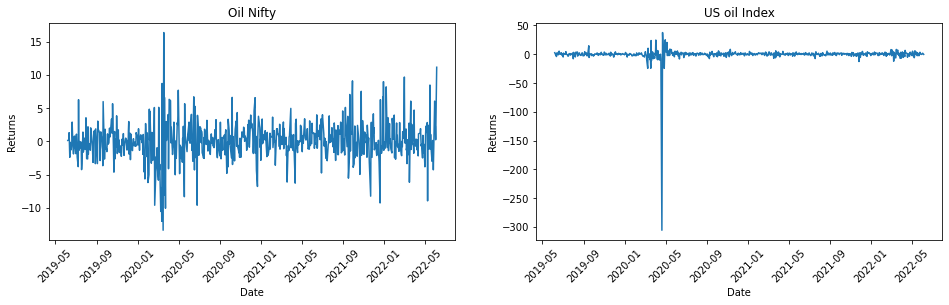

In [15]:
plot_returns('OIL.NS','CL=F','3y','1d')

In [16]:
def plot_close(ind_c, us_c ,p ,i):
    names={"ONGC.NS":"Oil and Natural Gas Corporation","XOM":"Exxon Oil",
       "RALLIS.NS":"Rallis","BAYERCROP.NS":"Bayer's Crop",
       "TECHM.NS":"Tech Mahindra","IBM":"IBM",
       "^NSEBANK":"Bank Nifty","^BKX":"US Bank Index",
         "OIL.NS":"Oil Nifty","CL=F":"US oil Index"}
    name_ind=[]
    name_us=[]
    if ind_c in [i for i in names.keys()]:
        name_ind.append(names[ind_c])
    if us_c in [i for i in names.keys()]:
        name_us.append(names[us_c])
    data_ind = yf.download(tickers=ind_c, 
                       period=p, 
                       interval=i)
    
    data_us = yf.download(tickers=us_c, 
                          period=p, 
                          interval=i)
    plt.figure(figsize = (16, 4))
    
    plt.subplot(1, 2, 1)
    plt.title(name_ind[0])
    plt.plot(data_ind['Close'])
    plt.xticks(rotation=45)
    plt.ylabel("Stock Price")
    plt.xlabel("Date")
    
    plt.subplot(1, 2, 2)
    plt.title(name_us[0])
    plt.plot(data_us['Close'])
    plt.xticks(rotation=45)
    plt.ylabel("Stock Price")
    plt.xlabel("Date")

    plt.show()
    
    plt.figure(figsize = (16, 4))
    ss= MinMaxScaler()
    xi = ss.fit_transform(np.array(data_ind['Close']).reshape(-1,1))
    xu = ss.fit_transform(np.array(data_us['Close']).reshape(-1,1))

    print(xi.shape,xu.shape)
    plt.plot(data_ind.index ,xi.reshape(-1,))
    plt.plot(data_us.index ,xu.reshape(-1,))
    ini ,final ='2019-12-31' , '2020-05-03'
    plt.fill_between( data_ind.index,
                      1,0,
                      where=(data_ind.index < final) & (data_ind.index > ini) ,
                      alpha=0.2)
    
    plt.xticks(rotation=45)
    plt.title(f"{name_ind[0]} v/s {name_us[0]}")
    plt.ylabel("Stock Price")
    plt.xlabel("Date")
    plt.show()
    


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


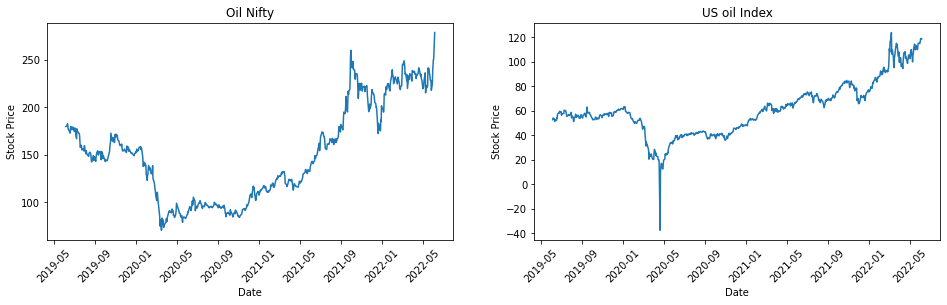

(744, 1) (758, 1)


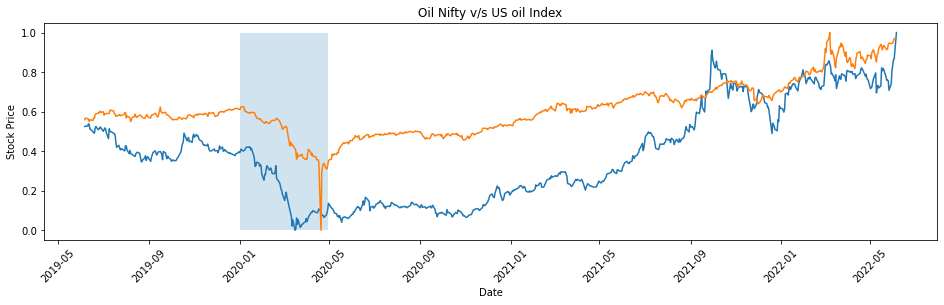

In [18]:
plot_close('OIL.NS','CL=F','3y','1d')